# Предскажите зарплату по тексту объявления

На сайтах для поиска работы можно найти сотни тысяч объявлений, каждое из которых состоит из пространного описания вакансии и предлагаемой зарплаты. Есть ли связь между описанием и зарплатой? Существуют ли определенные слова, которые наиболее сильно характеризуют зарплату? Можно ли найти другие информативные факторы? Вам предстоит ответить на эти вопросы, проанализировав выборку объявлений о работе в Великобритании. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls

Introduction.ipynb baseline.ipynb     features-train.zip
adult.data         features-train.csv intro.ipynb


Разархивируем скачанный архив с помощью консольной команды unzip

In [3]:
!unzip --help

UnZip 5.52 of 28 February 2005, by Info-ZIP.  Maintained by C. Spieler.  Send
bug reports using http://www.info-zip.org/zip-bug.html; see README for details.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment
  -x  exclude files that follow (in xlist)   -d  extract files into exdir

modifiers:                                   -q  quiet mode (-qq => quieter)
  -n  never overwrite existing files         -a  auto-convert any text files
  -o  overwrite files WITHOUT prompting      -aa treat ALL files as text
  -j  junk paths (do not make directories)   -v  be verbose/print version info
 

In [6]:
!unzip features-train.zip

Archive:  features-train.zip
  inflating: features-train.csv      


In [4]:
!ls

Introduction.ipynb baseline.ipynb     features-train.zip
adult.data         features-train.csv intro.ipynb


Появился файл features-train.csv

Объявляем используемые библиотеки

In [5]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from tqdm import tqdm

In [6]:
!head -n 2 features-train.csv

Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,Chartered Senior Quantity Surveyor,"Award winning multi disciplinary consultancy are looking for an experienced MRICS/FRICS Senior Quantity Surveyor to join their successful growing Quantity Surveying team. This is an excellent opportunity for an experienced Chartered Quantity Surveyor to take on team management responsibilities whilst maintaining a hands on involvement in providing and growing the Quantity Surveying team in the South West area. You will be highly involved in business development and will work alongside the Director on all cost related projects. You will be managing a small team of Quantity Surveyors mentoring APC junior Quantity Surveyors and guiding Chartered QS on a variety of projects from Pre contract  Post Contract. The successful candidate will need to be chartered MRICS/FRICS Senior Quantity Surveyor with consultancy experie

In [7]:
data = pd.read_csv('features-train.csv', header=0, index_col=0, sep=',')
data.head()

,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
Id,,,,,,,,,,,
0,Chartered Senior Quantity Surveyor,Award winning multi disciplinary consultancy a...,Somerset,Somerset,NaN,permanent,Resourcing Group,Consultancy Jobs,45000 - 55000/annum,50000,cv-library.co.uk
1,Net Developer VB / SQL Central Manchester *...,"A senior / experienced VB.Net Developer, with ...","Manchester, Greater Manchester, England, Great...",Manchester,NaN,permanent,CV Screen Ltd,IT Jobs,30000 - 45000/annum + benefits,37500,cv-library.co.uk
2,"Desktop Support Administrator Windows 7, Exch...","Desktop Support Administrator Windows 7, Exch...",Reading Berkshire South East,Reading,NaN,permanent,Spectrum IT,IT Jobs,26000 - 30000 per annum + excellent benefits,28000,totaljobs.com
3,Clinical Lead (RGN),RGN Clinical Lead Mid Glamorgan Very competiti...,Merthyr Tydfil Mid Glamorgan Wales,UK,NaN,permanent,BROOK STREET BUREAU Cardiff Care,Healthcare & Nursing Jobs,26026 - 29029 per annum + Benefits,27527,totaljobs.com
4,Charity Fundraisers GET PAID TO SAVE LIVES,CHARITY FUNDRAISING REPRESENTATIVES GET PAID ...,"Exeter,Devon,EXMOUTH,CREDITON,OTTERY ST MARY,D...",UK,NaN,permanent,Recruit4Talent,Sales Jobs,7 per hour + bonus,13440,jobsite.co.uk


In [8]:
all_texts = data[filter(lambda c: 'Salary' not in c, data.columns)].values
all_texts = map(lambda a: re.sub('[^a-z]', ' ', ' '.join(a).lower()), all_texts.astype(str))

In [9]:
len(all_texts)

179999

In [10]:
all_texts[0]

'chartered senior quantity surveyor award winning multi disciplinary consultancy are looking for an experienced mrics frics senior quantity surveyor to join their successful growing quantity surveying team  this is an excellent opportunity for an experienced chartered quantity surveyor to take on team management responsibilities whilst maintaining a hands on involvement in providing and growing the quantity surveying team in the south west area  you will be highly involved in business development and will work alongside the director on all cost related projects  you will be managing a small team of quantity surveyors mentoring apc junior quantity surveyors and guiding chartered qs on a variety of projects from pre contract  post contract  the successful candidate will need to be chartered mrics frics senior quantity surveyor with consultancy experience  you will need be a client facing senior quantity surveyor who has a proven track record in business development   has experience of gr

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=5)
_ = vectorizer.fit(all_texts)

In [12]:
X = vectorizer.transform(all_texts)
Y = data.SalaryNormalized.values

# Ridge regression

In [13]:
from sklearn.linear_model import ElasticNet, Ridge

In [14]:
%%time

lr = Ridge(solver='sag', alpha=0.1)
lr.fit(X,Y)

CPU times: user 16 s, sys: 131 ms, total: 16.2 s
Wall time: 16.3 s


In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [16]:
print 'R2 %.2f' % r2_score(Y, lr.predict(X))
print 'MAE %.2f' % mean_absolute_error(Y, lr.predict(X))
print 'RMSE %.2f' % np.sqrt(mean_squared_error(Y, lr.predict(X)))

R2 0.78
MAE 5798.47
RMSE 8311.72


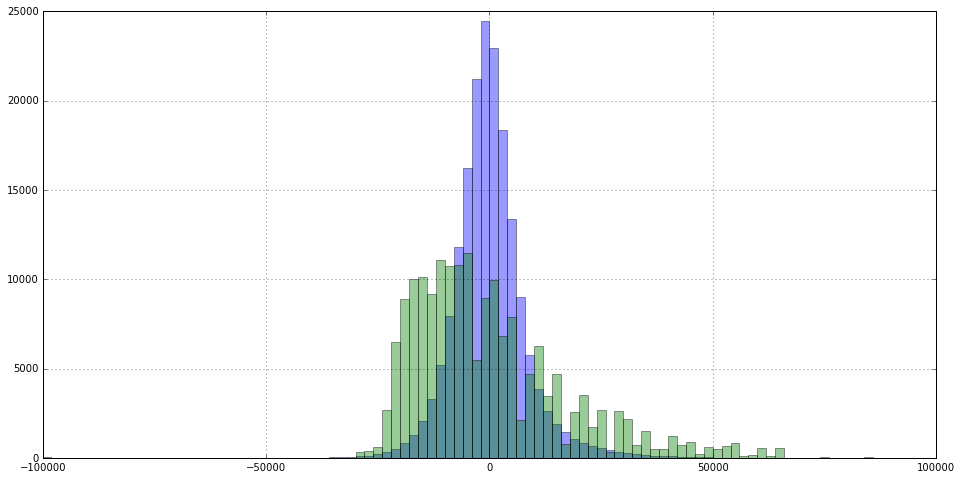

In [17]:
figsize(16,8)
plt.hist(Y - lr.predict(X), range=[-1e5, 1e5], bins=100, alpha=0.4)
plt.hist(Y - np.mean(Y), range=[-1e5, 1e5], bins=100, alpha=0.4)
plt.grid()

In [18]:
f_weights = zip(vectorizer.get_feature_names(), lr.coef_)
f_weights = sorted(f_weights, key=lambda i: i[1])
for i in range(1,30):
    print '%s, %.2f' % f_weights[-i]
    
print '...'
for i in reversed(range(1,30)):
    print '%s, %.2f' % f_weights[i]

gponline, 288926.42
seanlejgroup, 253197.89
openwork, 174770.07
njf, 161952.14
maneesha, 151935.64
medicaljobs, 148975.79
multitie, 148917.23
bvi, 145065.23
theladders, 136322.30
lhb, 135784.49
aifmd, 132141.74
adastra, 131189.31
davit, 125719.57
chanleap, 125182.56
honquest, 124786.90
dentistryflamehealth, 124751.26
johnjustgpjobs, 116657.06
noobligation, 115612.14
workcommitment, 113934.08
justgp, 111711.57
hindesite, 109209.68
brightpool, 107592.41
jumeirah, 105723.13
swiftsure, 102781.05
aiv, 102066.03
infochasemedical, 99816.96
fragmented, 97001.80
requiredthornbury, 96597.14
campion, 95419.05
...
stakes, -59566.03
footpath, -59871.04
beijing, -59962.84
mcmillan, -60596.26
sprinting, -60941.83
opps, -60994.21
pres, -61060.74
finformatiq, -61414.26
etech, -63011.66
cja, -63831.10
teksystems, -64642.79
justine, -65356.38
inlondonis, -65788.69
bv, -66989.12
abbas, -67547.51
yogurt, -67649.71
verticality, -67724.60
victoriacpresourcing, -68051.87
earthquake, -69695.26
nonexecutive, -7

# Location one-hot encoding

In [19]:
from sklearn.preprocessing import LabelBinarizer
from scipy.sparse import hstack

In [20]:
lb = LabelBinarizer()
loc_features = lb.fit_transform(data.LocationNormalized.values)
X = hstack([X, loc_features])

In [21]:
%%time

lr = Ridge(solver='sag', alpha=0.1)
lr.fit(X,Y)

CPU times: user 26.1 s, sys: 467 ms, total: 26.6 s
Wall time: 26.8 s


In [22]:
print 'R2 %.2f' % r2_score(Y, lr.predict(X))
print 'MAE %.2f' % mean_absolute_error(Y, lr.predict(X))
print 'RMSE %.2f' % np.sqrt(mean_squared_error(Y, lr.predict(X)))

R2 0.78
MAE 5732.53
RMSE 8215.62


# append SalaryRaw

In [23]:
all_texts = data[filter(lambda c: 'SalaryNormalized' not in c, data.columns)].values
all_texts = map(lambda a: re.sub('[^a-z, 0-9]', ' ', ' '.join(a).lower()), all_texts.astype(str))

In [24]:
all_texts[0]

'chartered senior quantity surveyor award winning multi disciplinary consultancy are looking for an experienced mrics frics senior quantity surveyor to join their successful growing quantity surveying team  this is an excellent opportunity for an experienced chartered quantity surveyor to take on team management responsibilities whilst maintaining a hands on involvement in providing and growing the quantity surveying team in the south west area  you will be highly involved in business development and will work alongside the director on all cost related projects  you will be managing a small team of quantity surveyors mentoring apc junior quantity surveyors and guiding chartered qs on a variety of projects from pre contract  post contract  the successful candidate will need to be chartered mrics frics senior quantity surveyor with consultancy experience  you will need be a client facing senior quantity surveyor who has a proven track record in business development   has experience of gr

In [25]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=5)
_ = vectorizer.fit(all_texts)

In [26]:
X = vectorizer.transform(all_texts)
Y = data.SalaryNormalized.values

In [27]:
%%time

lr = Ridge(solver='sag', alpha=0.1)
lr.fit(X,Y)

CPU times: user 14.8 s, sys: 305 ms, total: 15.1 s
Wall time: 15.4 s


In [28]:
print 'R2 %.2f' % r2_score(Y, lr.predict(X))
print 'MAE %.2f' % mean_absolute_error(Y, lr.predict(X))
print 'RMSE %.2f' % np.sqrt(mean_squared_error(Y, lr.predict(X)))

R2 0.86
MAE 4565.02
RMSE 6678.40


In [29]:
f_weights = zip(vectorizer.get_feature_names(), lr.coef_)
f_weights = sorted(f_weights, key=lambda i: i[1])
for i in range(1,30):
    print '%s, %.2f' % f_weights[-i]
    
print '...'
for i in reversed(range(1,30)):
    print '%s, %.2f' % f_weights[i]

seanlejgroup, 292546.56
gponline, 277491.43
100000, 247770.12
120000, 208860.18
110000, 191720.43
100k, 191046.20
90000, 188479.61
350, 186627.63
150000, 185661.13
120k, 177799.32
theladders, 174599.15
80000, 173681.13
91000, 170566.04
85000, 166706.04
lhb, 165098.94
bvi, 157451.17
99999, 155671.99
maneesha, 155118.72
90k, 150639.55
95000, 149503.82
375, 147842.93
openwork, 147156.50
njf, 146204.20
75000, 142488.61
325, 142177.64
400, 142061.43
380, 142057.94
adastra, 140467.20
aifmd, 139717.86
...
requiredlocation, -54060.97
supportengineer, -54808.74
stipend, -55606.95
stakes, -55809.46
currys, -56706.95
cja, -56965.78
managering, -58013.42
buxtonstaractuarial, -58864.50
muiramrgroup, -58967.59
mta, -59864.97
nonexecutive, -59880.52
5500, -60172.59
ec1v, -62230.56
10000, -63383.25
5000, -63749.01
081, -64262.79
juniorbroker, -64545.36
jobcentre, -65088.46
graduatefasttrack, -65900.32
safestyle, -66735.15
sprinting, -72795.79
gbp0, -74811.02
bv, -76216.99
petercvscreen, -78757.99
5050